<a href="https://colab.research.google.com/github/stav-aizik/AI-PROJECT/blob/main/Final_project_TSLA_stav_aizik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
#import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Tesla - download data

In [49]:
#download data(tesla)
tsla = yf.download("TSLA",start="2022-07-04",end="2023-07-04")
tsla.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [3]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        251 non-null    datetime64[ns]
 1   (Close, TSLA)   251 non-null    float64       
 2   (High, TSLA)    251 non-null    float64       
 3   (Low, TSLA)     251 non-null    float64       
 4   (Open, TSLA)    251 non-null    float64       
 5   (Volume, TSLA)  251 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.9 KB


In [4]:
tsla.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2022-07-05,233.066666,233.146667,216.166672,223.000000,84581100
1,2022-07-06,231.733337,234.563339,227.186661,230.779999,71853600
2,2022-07-07,244.543335,245.363327,232.210007,233.919998,81930600
3,2022-07-08,250.763336,254.979996,241.160004,242.333328,101854200
4,2022-07-11,234.343338,253.063339,233.626663,252.103333,99241200


In [39]:
tsla.tail()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
246,2023-06-27,250.210007,250.389999,240.850006,243.240005,164968200
247,2023-06-28,256.239990,259.880005,248.889999,249.699997,159770800
248,2023-06-29,257.500000,260.739990,253.610001,258.029999,131283400
249,2023-06-30,261.769989,264.450012,259.890015,260.600006,112267600
250,2023-07-03,279.820007,284.250000,275.109985,276.489990,119685900


#elon musk tweets - download data

In [40]:
#download elon musk tweets dataset
#"https://drive.google.com/file/d/154mg0W1alcEW_1DW4XyVKjBfU26FmTf6/view?usp=drive_link"
#https://www.kaggle.com/datasets/gpreda/elon-musk-tweets?resource=download
!gdown --fuzzy "https://drive.google.com/file/d/154mg0W1alcEW_1DW4XyVKjBfU26FmTf6/view?usp=sharing" -O elon_musk_tweets.zip
#unzip
!unzip elon_musk_tweets.zip -d elon_musk_tweets

Downloading...
From: https://drive.google.com/uc?id=154mg0W1alcEW_1DW4XyVKjBfU26FmTf6
To: /content/elon_musk_tweets.zip
100% 378k/378k [00:00<00:00, 38.3MB/s]
Archive:  elon_musk_tweets.zip
replace elon_musk_tweets/elon_musk_tweets.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: elon_musk_tweets/elon_musk_tweets.csv  
  inflating: elon_musk_tweets/wandb/run-20230613_064834-3fmloyay/files/conda-environment.yaml  
  inflating: elon_musk_tweets/wandb/run-20230613_064834-3fmloyay/files/config.yaml  
  inflating: elon_musk_tweets/wandb/run-20230613_064834-3fmloyay/files/output.log  
  inflating: elon_musk_tweets/wandb/run-20230613_064834-3fmloyay/files/requirements.txt  
  inflating: elon_musk_tweets/wandb/run-20230613_064834-3fmloyay/files/wandb-metadata.json  
  inflating: elon_musk_tweets/wandb/run-20230613_064834-3fmloyay/files/wandb-summary.json  
  inflating: elon_musk_tweets/wandb/run-20230613_064834-3fmloyay/logs/debug-internal.log  
  inflating: elon_musk_tweets/wandb/run

In [129]:
#read csv elon musk tweets
df=pd.read_csv("/content/elon_musk_tweets/elon_musk_tweets.csv")

View the information I will work with

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5904 entries, 0 to 5903
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5904 non-null   int64 
 1   user_name         5904 non-null   object
 2   user_location     1050 non-null   object
 3   user_description  1422 non-null   object
 4   user_created      5904 non-null   object
 5   user_followers    5904 non-null   int64 
 6   user_friends      5904 non-null   int64 
 7   user_favourites   5904 non-null   int64 
 8   user_verified     5904 non-null   bool  
 9   date              5904 non-null   object
 10  text              5904 non-null   object
 11  hashtags          2 non-null      object
 12  source            5904 non-null   object
 13  retweets          5904 non-null   int64 
 14  favorites         5904 non-null   int64 
 15  is_retweet        5904 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 657.4+ KB


In [43]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1544379368478212100,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240855,115,13503,True,2022-07-05 17:55:09+00:00,@BillyM2k I find the gold toe sock – inevitabl...,NaN,Twitter for iPhone,335,6542,False
1,1544377493263720450,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:47:42+00:00,"Sock Con, the conference for socks",NaN,Twitter for iPhone,1451,30753,False
2,1544377130590552064,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:46:15+00:00,Always something new for the magazine cover an...,NaN,Twitter for iPhone,1284,28610,False
3,1544375575724400645,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:40:05+00:00,@ExplainThisBob This guy gets it,NaN,Twitter for iPhone,131,3640,False
4,1544375148605853699,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:38:23+00:00,Sock tech is so advanced that you can get pret...,NaN,Twitter for iPhone,1191,23790,False


In [44]:
print(df["user_verified"].unique())

[ True False]


In [45]:
print((df["user_verified"]==False).sum())

1837


In [46]:
df.tail()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
5899,1665143503108677634,Elon Musk,NaN,NaN,2009-06-02 20:12:29+00:00,143325985,330,25655,False,2023-06-03 23:48:42+00:00,@JonErlichman He’s not wrong …,NaN,Twitter for iPhone,361,4791,False
5900,1665139144425631747,Elon Musk,NaN,NaN,2009-06-02 20:12:29+00:00,143325985,330,25655,False,2023-06-03 23:31:23+00:00,"@alifarhat79 Guys, I think I maybe took too mu...",NaN,Twitter for iPhone,1609,61964,False
5901,1665137204782419968,Elon Musk,NaN,NaN,2009-06-02 20:12:29+00:00,143325985,330,25655,False,2023-06-03 23:23:41+00:00,@sriramk Cool,NaN,Twitter for iPhone,46,879,False
5902,1665131126900285445,Elon Musk,NaN,NaN,2009-06-02 20:12:29+00:00,143325985,330,25655,False,2023-06-03 22:59:31+00:00,@cb_doge Time to complete the circle,NaN,Twitter for iPhone,898,12467,False
5903,1665121551652474880,Elon Musk,NaN,NaN,2009-06-02 20:12:29+00:00,143325985,330,25655,False,2023-06-03 22:21:29+00:00,@Jason Late stage civilization complacency,NaN,Twitter for iPhone,1997,38113,False


In [47]:
df['user_followers'].nunique()

655

#Pre-processing - tesla

In [5]:
#Changing the date data type
tsla["date"]=pd.to_datetime(tsla["Date"]).dt.tz_localize(None).dt.normalize()

In [6]:
tsla.columns

MultiIndex([(  'Date',     ''),
            ( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA'),
            (  'date',     '')],
           names=['Price', 'Ticker'])

In [7]:
tsla.columns = [col[0] for col in tsla.columns]

In [8]:
tsla.head()

,Date,Close,High,Low,Open,Volume,date
0,2022-07-05,233.066666,233.146667,216.166672,223.000000,84581100,2022-07-05
1,2022-07-06,231.733337,234.563339,227.186661,230.779999,71853600,2022-07-06
2,2022-07-07,244.543335,245.363327,232.210007,233.919998,81930600,2022-07-07
3,2022-07-08,250.763336,254.979996,241.160004,242.333328,101854200,2022-07-08
4,2022-07-11,234.343338,253.063339,233.626663,252.103333,99241200,2022-07-11


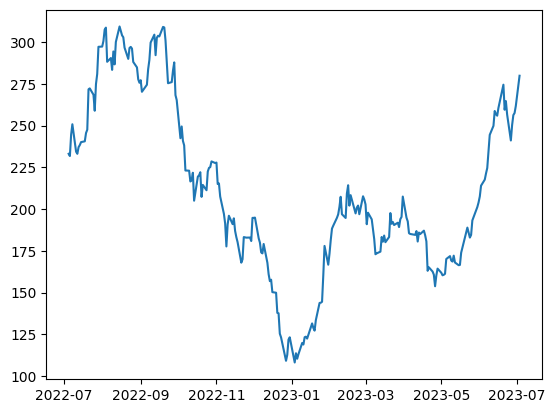

In [9]:
plt.plot(tsla["date"], tsla["Close"])

In [10]:
pd.concat([tsla["Close"],
          tsla["Close"].shift(-1),
          tsla["Close"].shift(+1)],
          keys = ["Close","TMW","Yesterdy"],axis=1).head()

,Close,TMW,Yesterdy
0,233.066666,231.733337,NaN
1,231.733337,244.543335,233.066666
2,244.543335,250.763336,231.733337
3,250.763336,234.343338,244.543335
4,234.343338,233.070007,250.763336


In [11]:
tsla["Close Change"] = (tsla["Close"].shift(-1) - tsla["Close"])

In [12]:
tsla.head()

,Date,Close,High,Low,Open,Volume,date,Close Change
0,2022-07-05,233.066666,233.146667,216.166672,223.000000,84581100,2022-07-05,-1.333328
1,2022-07-06,231.733337,234.563339,227.186661,230.779999,71853600,2022-07-06,12.809998
2,2022-07-07,244.543335,245.363327,232.210007,233.919998,81930600,2022-07-07,6.220001
3,2022-07-08,250.763336,254.979996,241.160004,242.333328,101854200,2022-07-08,-16.419998
4,2022-07-11,234.343338,253.063339,233.626663,252.103333,99241200,2022-07-11,-1.273331


In [13]:
tsla.loc[tsla["Close Change"]>0,"lable"]=1
tsla.loc[tsla["Close Change"]<0,"lable"] = -1

In [14]:
tsla = tsla.dropna(subset=['Close Change'])

In [15]:
tsla

,Date,Close,High,Low,Open,Volume,date,Close Change,lable
0,2022-07-05,233.066666,233.146667,216.166672,223.000000,84581100,2022-07-05,-1.333328,-1.0
1,2022-07-06,231.733337,234.563339,227.186661,230.779999,71853600,2022-07-06,12.809998,1.0
2,2022-07-07,244.543335,245.363327,232.210007,233.919998,81930600,2022-07-07,6.220001,1.0
3,2022-07-08,250.763336,254.979996,241.160004,242.333328,101854200,2022-07-08,-16.419998,-1.0
4,2022-07-11,234.343338,253.063339,233.626663,252.103333,99241200,2022-07-11,-1.273331,-1.0
...,...,...,...,...,...,...,...,...,...
245,2023-06-26,241.050003,258.369995,240.699997,250.070007,179990600,2023-06-26,9.160004,1.0
246,2023-06-27,250.210007,250.389999,240.850006,243.240005,164968200,2023-06-27,6.029984,1.0
247,2023-06-28,256.239990,259.880005,248.889999,249.699997,159770800,2023-06-28,1.260010,1.0
248,2023-06-29,257.500000,260.739990,253.610001,258.029999,131283400,2023-06-29,4.269989,1.0


In [16]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          250 non-null    datetime64[ns]
 1   Close         250 non-null    float64       
 2   High          250 non-null    float64       
 3   Low           250 non-null    float64       
 4   Open          250 non-null    float64       
 5   Volume        250 non-null    int64         
 6   date          250 non-null    datetime64[ns]
 7   Close Change  250 non-null    float64       
 8   lable         249 non-null    float64       
dtypes: datetime64[ns](2), float64(6), int64(1)
memory usage: 19.5 KB


#pre-processing - tweets

In [148]:
#Changing the date data type
df["date"] = pd.to_datetime(df["date"]).dt.tz_localize(None).dt.normalize()

In [149]:
#new table
tweets= df[["date","user_followers","text"]]

In [150]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5904 entries, 0 to 5903
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   date            5904 non-null   datetime64[ns, UTC]
 1   user_followers  5904 non-null   int64              
 2   text            5904 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 138.5+ KB


In [151]:
tweets

,date,user_followers,text
0,2022-07-05 00:00:00+00:00,101240855,@BillyM2k I find the gold toe sock – inevitabl...
1,2022-07-05 00:00:00+00:00,101240806,"Sock Con, the conference for socks"
2,2022-07-05 00:00:00+00:00,101240806,Always something new for the magazine cover an...
3,2022-07-05 00:00:00+00:00,101240806,@ExplainThisBob This guy gets it
4,2022-07-05 00:00:00+00:00,101240806,Sock tech is so advanced that you can get pret...
...,...,...,...
5899,2023-06-03 00:00:00+00:00,143325985,@JonErlichman He’s not wrong …
5900,2023-06-03 00:00:00+00:00,143325985,"@alifarhat79 Guys, I think I maybe took too mu..."
5901,2023-06-03 00:00:00+00:00,143325985,@sriramk Cool
5902,2023-06-03 00:00:00+00:00,143325985,@cb_doge Time to complete the circle


#EDA - Tesla, code

In [18]:
tsla.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       240, 241, 242, 243, 244, 245, 246, 247, 248, 249],
      dtype='int64', length=250)

In [19]:
tsla.set_index('date',inplace=True)

In [24]:
tsla.index

DatetimeIndex(['2022-07-05', '2022-07-06', '2022-07-07', '2022-07-08',
               '2022-07-11', '2022-07-12', '2022-07-13', '2022-07-14',
               '2022-07-15', '2022-07-18',
               ...
               '2023-06-16', '2023-06-20', '2023-06-21', '2023-06-22',
               '2023-06-23', '2023-06-26', '2023-06-27', '2023-06-28',
               '2023-06-29', '2023-06-30'],
              dtype='datetime64[ns]', name='date', length=250, freq=None)

In [22]:
tsla['month'] = tsla.index.to_period('M')

In [25]:
tsla

,Date,Close,High,Low,Open,Volume,Close Change,lable,month
date,,,,,,,,,
2022-07-05,2022-07-05,233.066666,233.146667,216.166672,223.000000,84581100,-1.333328,-1.0,2022-07
2022-07-06,2022-07-06,231.733337,234.563339,227.186661,230.779999,71853600,12.809998,1.0,2022-07
2022-07-07,2022-07-07,244.543335,245.363327,232.210007,233.919998,81930600,6.220001,1.0,2022-07
2022-07-08,2022-07-08,250.763336,254.979996,241.160004,242.333328,101854200,-16.419998,-1.0,2022-07
2022-07-11,2022-07-11,234.343338,253.063339,233.626663,252.103333,99241200,-1.273331,-1.0,2022-07
...,...,...,...,...,...,...,...,...,...
2023-06-26,2023-06-26,241.050003,258.369995,240.699997,250.070007,179990600,9.160004,1.0,2023-06
2023-06-27,2023-06-27,250.210007,250.389999,240.850006,243.240005,164968200,6.029984,1.0,2023-06
2023-06-28,2023-06-28,256.239990,259.880005,248.889999,249.699997,159770800,1.260010,1.0,2023-06


In [26]:
group_month = tsla.groupby('month')

In [30]:
open = group_month.describe()['Open'][['max','min','mean']]

In [32]:
close = group_month.describe()['Close'][['max','min','mean']]

In [35]:
volume = group_month.describe()['Volume'][['max','min','mean']]

In [ ]:
tsla["Close Change"] = (tsla["Close"].shift(-1) - tsla["Close"])

#EDA - TESLA - Results

In [38]:
open

,max,min,mean
month,,,
2022-07,280.700012,223.000000,250.038598
2022-08,311.666656,280.619995,297.223042
2022-09,308.290009,266.149994,287.885710
2022-10,254.500000,205.820007,224.126190
2022-11,234.050003,168.630005,193.479049
2022-12,197.080002,110.349998,155.897143
2023-01,178.050003,103.000000,132.316000
2023-02,211.759995,173.889999,198.178420
2023-03,206.210007,167.460007,188.425218


In [37]:
close

,max,min,mean
month,,,
2022-07,297.149994,231.733337,252.664736
2022-08,309.320007,275.609985,294.869857
2022-09,309.070007,265.250000,288.734763
2022-10,249.440002,204.990005,223.810477
2022-11,227.820007,167.869995,191.246666
2022-12,194.860001,109.099998,152.970476
2023-01,177.899994,108.099998,134.195999
2023-02,214.240005,181.410004,199.775264
2023-03,207.460007,172.919998,188.522609


In [36]:
volume

,max,min,mean
month,,,
2022-07,142032300.0,64073400.0,8.791704e+07
2022-08,117042900.0,41864700.0,7.370710e+07
2022-09,87087800.0,48674600.0,6.187005e+07
2022-10,117798100.0,61554300.0,8.263158e+07
2022-11,132703000.0,50672700.0,8.977501e+07
2022-12,221923300.0,73645900.0,1.402023e+08
2023-01,306590600.0,138858100.0,1.948750e+08
2023-02,232662000.0,142228100.0,1.907813e+08
2023-03,191488900.0,98654600.0,1.439835e+08


<function matplotlib.pyplot.show(close=None, block=None)>

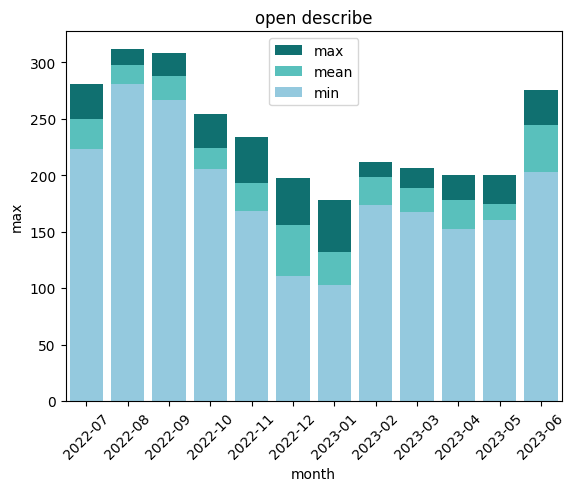

In [47]:
plt.title('open describe')
sns.barplot(x='month',y='max',data= open , color='teal',label='max')
sns.barplot(x='month',y='mean',data = open , color = 'mediumturquoise', label = 'mean')
sns.barplot(x='month',y='min',data = open , color='skyblue', label = 'min')
plt.xticks(rotation=45)
plt.show

Date                                                      \
        count                           mean                  min   
month                                                               
2022-07    19  2022-07-17 03:47:22.105263104  2022-07-05 00:00:00   
2022-08    23  2022-08-15 15:39:07.826086912  2022-08-01 00:00:00   
2022-09    21  2022-09-16 13:42:51.428571392  2022-09-01 00:00:00   
2022-10    21  2022-10-16 05:42:51.428571392  2022-10-03 00:00:00   
2022-11    21  2022-11-14 21:42:51.428571392  2022-11-01 00:00:00   
2022-12    21  2022-12-15 13:42:51.428571392  2022-12-01 00:00:00   
2023-01    20            2023-01-16 15:36:00  2023-01-03 00:00:00   
2023-02    19            2023-02-14 00:00:00  2023-02-01 00:00:00   
2023-03    23  2023-03-16 08:20:52.173913088  2023-03-01 00:00:00   
2023-04    19  2023-04-15 22:44:12.631578880  2023-04-03 00:00:00   
2023-05    22  2023-05-15 01:05:27.272727296  2023-05-01 00:00:00   
2023-06    21  2023-06-15 21:42:51.428571392  2023-06-01 00:00:00   

                                                                        \
                         25%                  50%                  75%   
month                                                                    
2022-07  2022-07-11 12:00:00  2022-07-18 00:00:00  2022-07-23 12:00:00   
2022-08  2022-08-08 12:00:00  2022-08-16 00:00:00  2022-08-23 12:00:00   
2022-09  2022-09-09 00:00:00  2022-09-16 00:00:00  2022-09-23 00:00:00   
2022-10  2022-10-10 00:00:00  2022-10-17 00:00:00  2022-10-24 00:00:00   
2022-11  2022-11-08 00:00:00  2022-11-15 00:00:00  2022-11-22 00:00:00   
2022-12  2022-12-08 00:00:00  2022-12-15 00:00:00  2022-12-22 00:00:00   
2023-01  2023-01-09 18:00:00  2023-01-17 12:00:00  2023-01-24 06:00:00   
2023-02  2023-02-07 12:00:00  2023-02-14 00:00:00  2023-02-21 12:00:00   
2023-03  2023-03-08 12:00:00  2023-03-16 00:00:00  2023-03-23 12:00:00   
2023-04  2023-04-10 12:00:00  2023-04-17 00:00:00  2023-04-22 12:00:00   
2023-05  2023-05-08 06:00:00  2023-05-15 12:00:00  2023-05-22 18:00:00   
2023-06  2023-06-08 00:00:00  2023-06-15 00:00:00  2023-06-23 00:00:00   

                                  Close              ... Close Change  \
                         max  std count        mean  ...          max   
month                                                ...                
2022-07  2022-07-29 00:00:00  NaN  19.0  252.664736  ...    24.206665   
2022-08  2022-08-31 00:00:00  NaN  23.0  294.869857  ...    13.399994   
2022-09  2022-09-30 00:00:00  NaN  21.0  288.734763  ...    10.479980   
2022-10  2022-10-31 00:00:00  NaN  21.0  223.810477  ...    14.360001   
2022-11  2022-11-30 00:00:00  NaN  21.0  191.246666  ...    13.869995   
2022-12  2022-12-30 00:00:00  NaN  21.0  152.970476  ...     9.110001   
2023-01  2023-01-31 00:00:00  NaN  20.0  134.195999  ...    17.629990   
2023-02  2023-02-28 00:00:00  NaN  19.0  199.775264  ...    14.610001   
2023-03  2023-03-31 00:00:00  NaN  23.0  188.522609  ...    14.330002   
2023-04  2023-04-28 00:00:00  NaN  19.0  176.955262  ...     6.440002   
2023-05  2023-05-31 00:00:00  NaN  22.0  175.799090  ...     8.860001   
2023-06  2023-06-30 00:00:00  NaN  21.0  246.090476  ...    18.050018   

                  lable                                               
              std count      mean  min  25%  50%  75%  max       std  
month                                                                 
2022-07  9.298709  19.0  0.473684 -1.0  0.0  1.0  1.0  1.0  0.904828  
2022-08  7.501702  23.0 -0.130435 -1.0 -1.0 -1.0  1.0  1.0  1.013740  
2022-09  9.815244  21.0  0.047619 -1.0 -1.0  1.0  1.0  1.0  1.023533  
2022-10  8.131718  21.0  0.142857 -1.0 -1.0  1.0  1.0  1.0  1.014185  
2022-11  8.213879  20.0 -0.200000 -1.0 -1.0 -1.0  1.0  1.0  1.005249  
2022-12  6.849930  21.0 -0.428571 -1.0 -1.0 -1.0  1.0  1.0  0.925820  
2023-01  6.819119  20.0  0.400000 -1.0 -1.0  1.0  1.0  1.0  0.940325  
2023-02  7.218658  19.0  0.263158 -1.0 -1.0  1.0  1.0  1

#merge data

In [152]:
print(tweets["date"].dtype)
print(tsla["date"].dtype)

datetime64[ns, UTC]
datetime64[ns]


In [153]:
merged_df = pd.merge(tweets,tsla,on="date",how="inner")

ValueError: You are trying to merge on datetime64[ns, UTC] and datetime64[ns] columns for key 'date'. If you wish to proceed you should use pd.concat

In [93]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            0 non-null      datetime64[ns]
 1   user_followers  0 non-null      int64         
 2   text            0 non-null      object        
 3   Date            0 non-null      datetime64[ns]
 4   Close           0 non-null      float64       
 5   High            0 non-null      float64       
 6   Low             0 non-null      float64       
 7   Open            0 non-null      float64       
 8   Volume          0 non-null      int64         
dtypes: datetime64[ns](2), float64(4), int64(2), object(1)
memory usage: 132.0+ bytes


#EDA - tweets

#comments

In [15]:
#tsla.columns=tsla.columns.get_level_values(0)